# Lab 3 Semnale
_Theodor Moroianu - Grupa 334_

## Exercitiul 1

Se da semnalul sonor generat de un contrabas, incadrat intre $40Hz$ si $200Hz$. Dorim sa aflam frecventa minima de esantionare trece-banda.\
Conform teoremei Niquist, frecventa minima de esantionare trebuie sa fie $2 * 200 = 400Hz$.


## Exercitiul 2

Stim ca pentru o esantionare eficienta sub-Nyquist, trebuie sa avem:
$$
\frac{2f_c - B}{m} \geq f_s \geq \frac{2f_c + B}{m + 1}\\
f_s > 2B
$$

Din enunt, stim:
 * $B = 10Hz$.
 * $f_c = 90Hz$.

Dorim sa vedem frecventa optima de esantionare pentru $m = 1$, $m = 2$, $m = 3$.

In [2]:
def good_esant_interval(fc, B, m):
    min_value = (2 * fc + B) / (m + 1)
    max_value = (2 * fc - B) / m
    min_value = max(min_value, 2 * B)

    return min_value, max_value

B = 10
fc = 90

print(f"Frecventa optima de esantionare sub-Nyquist este:")
for m in [1, 2, 3]:
    print(f" * Pentru m={m} {good_esant_interval(fc, B, m)} Hz")

Frecventa optima de esantionare sub-Nyquist este:
 * Pentru m=1 (95.0, 170.0) Hz
 * Pentru m=2 (63.333333333333336, 85.0) Hz
 * Pentru m=3 (47.5, 56.666666666666664) Hz


## Exercitiul 3

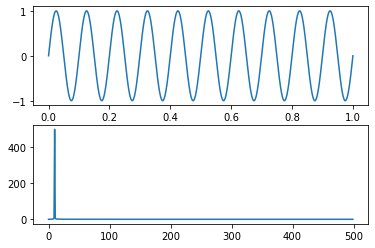

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# frecventa semnalului
fc = 10

# functie care calculeaza semnalul intr-un punct
def semnal(t):
    return np.sin(2 * np.pi * fc * t)

orizont_timp = 1
fs = 1000

# puncte discrete de esantionare
disc_time = np.linspace(0, orizont_timp, int(orizont_timp * fs) + 1)

# semnalul discret, esantionat la frecventa fs, pe o lungime de orizont_timp s
semnal_disc = semnal(disc_time)

# transformata Fourier a semnalului discret
fft = np.fft.fft(semnal_disc)
fft = fft[: len(fft) // 2]
fft = np.abs(fft)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False)

axes[0].plot(disc_time, semnal_disc)
axes[1].plot(fft)

plt.show()


## Exercitiul 4

Am citit 503 elemente. 24h * 7z * 3 sapt = 504


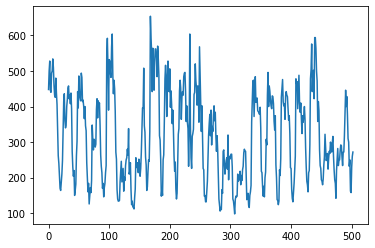

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Citim datele
with open('trafic.csv') as fin:
    reader = csv.reader(fin)
    data = np.array(list(reader))
    data = data[1:]
    data = [int(i) for i in data]

# Afisari de verificare
print(f"Am citit {len(data)} elemente. 24h * 7z * 3 sapt = {24 * 7 * 3}")
plt.plot(data)
plt.show()

Datele pentru 3 zile ne-procesate:


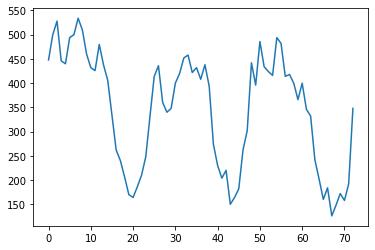

In [30]:
raw_3d = data[:24 * 3 + 1]
print(f"Datele pentru 3 zile ne-procesate:")
plt.plot(raw_3d)
plt.show()

Clean signal:


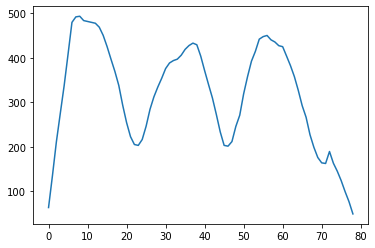

In [31]:
# filtru de netezire
def clean_signal(signal, strength=7):
    return np.convolve(signal, np.ones(strength)) / strength

clean_3d = clean_signal(raw_3d)
print("Clean signal:")
plt.plot(clean_3d)
plt.show()

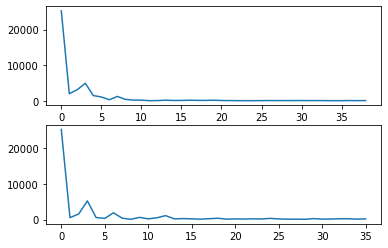

In [35]:
# Transformata Fourier
def compute_fft(semnal):
    fft = np.fft.fft(semnal)
    fft = fft[: len(fft) // 2]
    fft = np.abs(fft)
    return fft

fft_clean = compute_fft(clean_3d)
fft_raw = compute_fft(raw_3d)


fig, axes = plt.subplots(ncols=1, nrows=2)

axes[0].plot(fft_clean)
axes[0].set_title = "Semnal Netezit"

axes[1].plot(fft_raw)
axes[1].set_title = "Semnal Initial"
plt.show()